In [311]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [312]:
dfCsv = pd.read_csv("datas/bank/bank-full.csv")
defaultMap = {'yes':1 ,'no':0}
loanMap = {'yes':1 ,'no':0}
targetMap = {'yes':1 ,'no':0}
housingMap = {'yes':1 ,'no':0}
maritalMap = {'single':0 ,'married':1,'divorced':2}
educationMap = {'unknown':0 ,'primary':1,'secondary':2,'tertiary':3}
contactMap = {'unknown':0 ,'cellular':1,'telephone':1}
poutcomeMap = {'unknown':0, 'success':1,'failure':2,'other':3}
monthMap = {'jan':1, 'feb':2, 'mar':3, 'apr':4, 'may':5, 'jun':6,'jul':7,'aug':8,'sep':9, 'oct':10,'nov':11,'dec':12}

In [313]:
# df.dtypes
# # df.isnull().sum()

In [314]:
# df['month'].value_counts(dropna=False)


In [315]:
# Importation du générateur de rapport de profile
from pandas_profiling import ProfileReport

In [316]:
# profile = ProfileReport(df)
# profile.to_file('bank-full-report.html')
def balancingTragetResult(df):
    count = df["Target"].value_counts()
    countNo = count['no']
    countYes = count['yes']

    dfTargetNo = df.loc[(df['Target'] == 'no')].sample(n = countYes, random_state = 23)
    dfTargetYes = df.loc[(df['Target'] == 'yes')]
    # dfClientDatadfReadable = pd.concat([dfTargetNo, dfTargetYes])
    return pd.concat([dfTargetNo, dfTargetYes])


In [364]:
def dfAgeScale(df):
    bins = [18, 25, 30, 40, 48, 56, 80, 90, 100]
    labels = ['18-24','25-29', '30-39', '40-47', '48-55', '56-60', '61-79', '80-99']
    df['age'] = pd.cut(df.age, bins, labels = labels,include_lowest = True)
    return df

#split data for the first model
array = ['age','marital','education','default','balance','housing','loan','month','duration','campaign','pdays','previous','poutcome','Target']

# Clean data for the model
dfClientData = dfCsv[array]
dfClientData = balancingTragetResult(dfClientData)
dfClientData['default'] = dfClientData['default'].map(defaultMap) 
dfClientData['loan'] = dfClientData['loan'].map(loanMap) 
dfClientData['Target'] = dfClientData['Target'].map(targetMap) 
dfClientData['housing'] = dfClientData['housing'].map(housingMap)
dfClientData['marital'] = dfClientData['marital'].map(maritalMap)
dfClientData['education'] = dfClientData['education'].map(educationMap)
dfClientData['month'] = dfClientData['month'].map(monthMap)
dfClientData['poutcome'] = dfClientData['poutcome'].map(poutcomeMap)
dfClientData = dfAgeScale(dfClientData.sort_values(by=['age']))
dfClientData['age'] = dfClientData['age'].map({'18-24':1,'25-29':2, '30-39':3, '40-47':4, '48-55':5, '56-60':6, '61-79':7, '80-99':8})
dfClientData = dfClientData[dfClientData.balance < 45000]
dfClientData = dfClientData[dfClientData.duration < 1500]

# #brut data for the graph 
# dfClientBrutData = dfCsv[array].sort_values(by=['age'])

# #Brut data converted 
# dfClientDataReadable = dfCsv[array]
# dfClientDataReadable = balancingTragetResult(dfClientDataReadable)
# dfClientDataReadable = dfAgeScale(dfClientDataReadable.sort_values(by=['age']))

# # dfClientDataReadable = dfClientDataReadable[dfClientDataReadable.balance < 45000]
# dfClientDataReadable = dfClientDataReadable[dfClientDataReadable.duration < 1500]
# dfClientDataReadable

dfClientData
# dfClientDataReadable
# dfClientData['age'].value_counts()
# dfTargetNo['Target'].value_counts()

age  marital  education  default  balance  housing  loan  month  \
41487   1        0          0        0      108        0     0      9   
40887   1        0          1        0      608        0     0      8   
43637   1        0          0        0      348        0     0      5   
42274   1        0          1        0      608        0     0     11   
40744   1        0          0        0      108        0     0      8   
...    ..      ...        ...      ...      ...      ...   ...    ...   
42727   8        1          0        0      775        0     0      1   
44262   8        1          0        0      775        0     0      7   
44420   8        1          0        0      775        0     0      8   
33699   8        2          1        0     2282        0     0      4   
41663   8        1          2        0        0        0     0     10   

       duration  campaign  pdays  previous  poutcome  Target  
41487       169         1     -1         0         0       1  
40887       267         1     -1         0         0       1  
43637       443         4     -1         0         0       1  
42274       210         1     93         1         1       1  
40744       167         1     -1         0         0       1  
...         ...       ...    ...       ...       ...     ...  
42727       164         4     96         3         1       1  
44262       860         2    177         7         1       1  
44420       476         2     13         9         1       1  
33699       207        17     -1         0         0       1  
41663       215         1     -1         0         0       0  

[10418 rows x 14 columns]

In [338]:
dfClientData["poutcome"].value_counts()

# dfClientDataDelTargetZeroVal = dfClientData.Target
# dfClientDataDelTargetZeroVal

0    7701
2    1162
1    1036
3     526
Name: poutcome, dtype: int64

In [332]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# First model

In [333]:
y = dfClientData.Target
x = dfClientData.drop(['Target'], axis = 1)

x_train,x_test, y_train, y_test = train_test_split(x,y,test_size = .2, random_state = 42)

In [335]:
def print_score(learn_obj, x_train=x_train, y_train=y_train, x_test=x_test, y_test=y_test):
	print("Score train : ", learn_obj.score(x_train, y_train,)*100, "%")
	print("Score test : ", learn_obj.score(x_test, y_test,)*100, "%")

In [351]:
rf = RandomForestClassifier(n_estimators = 100, random_state = 23, max_features = 2)
rf.fit(X=x_train, y=y_train)
print_score(rf)

Score train :  100.0 %
Score test :  84.07673860911271 %


In [368]:
from sklearn.linear_model import LogisticRegression
from sklearn.inspection import DecisionBoundaryDisplay
import numpy as np

from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(x_train)

X_scaled = scaler.transform(x_train)
logreg = LogisticRegression(C=1e5)
logreg.fit(X_scaled, y_train)
print_score(logreg)

# disp = DecisionBoundaryDisplay.from_estimator(
#     classifier, X_scaled, response_method="predict",
#     xlabel='age', ylabel='Target',
#     alpha=0.5,
# )

# disp.ax_.scatter(X[:, 0], X[:, 1], c=x_train.target, edgecolor="k")

# plt.show()

Score train :  49.66426858513189 %
Score test :  49.304556354916066 %


C:\Users\zchen\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:443: UserWarning:

X has feature names, but LogisticRegression was fitted without feature names

C:\Users\zchen\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:443: UserWarning:

X has feature names, but LogisticRegression was fitted without feature names



In [159]:
#Chaque colonne elle prend en compte à 8% Pclass, 25% le Sex etc, ainsi c'est l'importance des données en entrer 
pd.DataFrame(rf.feature_importances_*100,x_train.columns, columns=['Importance en %'])

Importance en %
age               5.795034
marital           2.615462
education         3.476249
default           0.223050
balance          14.564262
housing           4.518890
loan              1.312084
month            10.610606
duration         40.010065
campaign          5.309925
pdays             4.638283
previous          2.969819
poutcome          3.956271

In [160]:
# import shap

# shpv = shap.TreeExplainer(rf).shap_values(x_train)
# shap.summary_plot(shpv, x_train)
import plotly.express as px

def histogram(df, x, y):
    fig = px.histogram(df, x=x,y=y)
    fig.show()
    
def pieChart(df, values, names):
    fig = px.pie(df, values=x,names=y)
    fig.show()

In [163]:
dfClientDataReadable

age   marital  education default  balance housing loan month  \
41487  18-24    single    unknown      no      108      no   no   sep   
40887  18-24    single    primary      no      608      no   no   aug   
43637  18-24    single    unknown      no      348      no   no   may   
42274  18-24    single    primary      no      608      no   no   nov   
40744  18-24    single    unknown      no      108      no   no   aug   
...      ...       ...        ...     ...      ...     ...  ...   ...   
42727  80-99   married    unknown      no      775      no   no   jan   
44262  80-99   married    unknown      no      775      no   no   jul   
44420  80-99   married    unknown      no      775      no   no   aug   
33699  80-99  divorced    primary      no     2282      no   no   apr   
41663  80-99   married  secondary      no        0      no   no   oct   

       duration  campaign  pdays  previous poutcome Target  
41487       169         1     -1         0  unknown    yes  
40887       267         1     -1         0  unknown    yes  
43637       443         4     -1         0  unknown    yes  
42274       210         1     93         1  success    yes  
40744       167         1     -1         0  unknown    yes  
...         ...       ...    ...       ...      ...    ...  
42727       164         4     96         3  success    yes  
44262       860         2    177         7  success    yes  
44420       476         2     13         9  success    yes  
33699       207        17     -1         0  unknown    yes  
41663       215         1     -1         0  unknown     no  

[10570 rows x 14 columns]

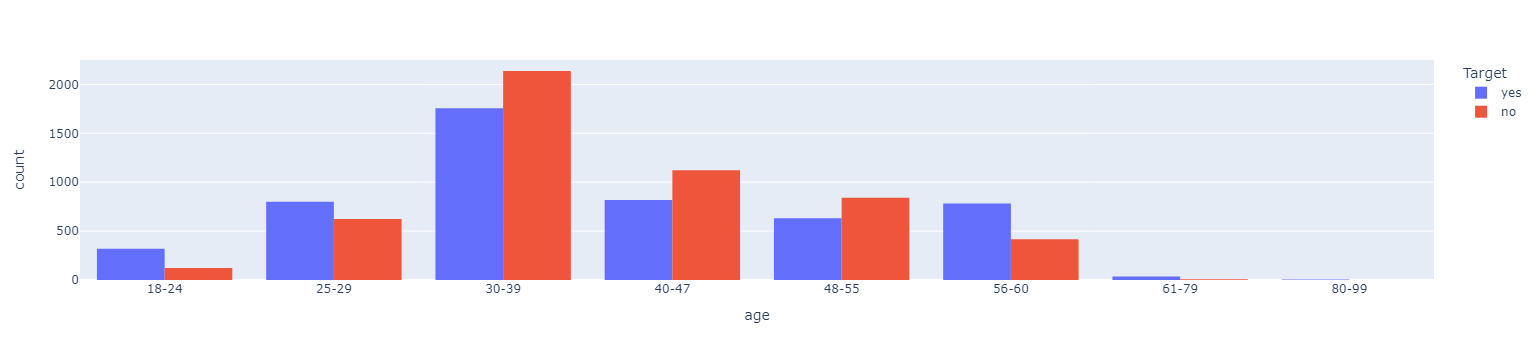

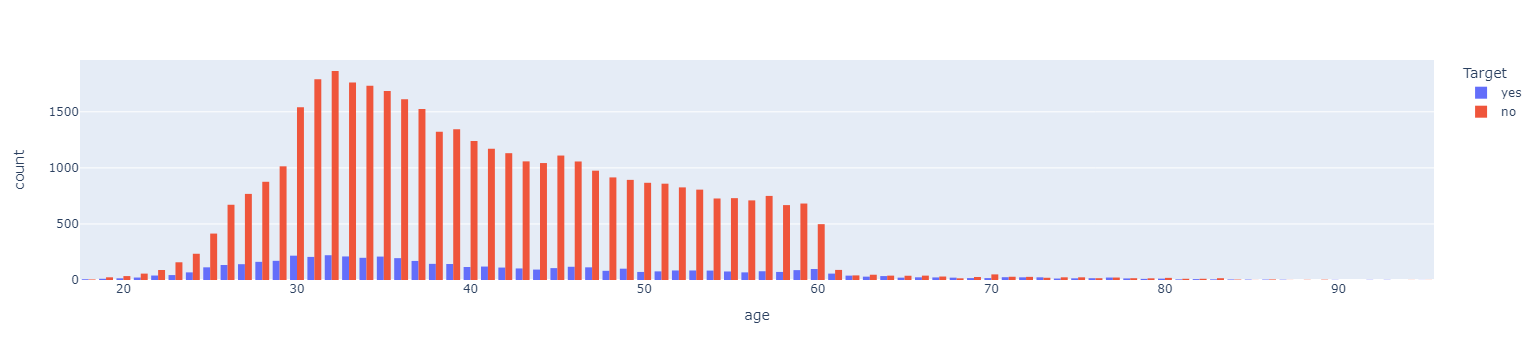

In [ ]:
fig = px.histogram(dfClientDataReadable, x="age", color="Target", barmode="group")
fig.show()
fig = px.histogram(dfClientBrutData, x="age", color="Target", barmode="group")
fig.show()

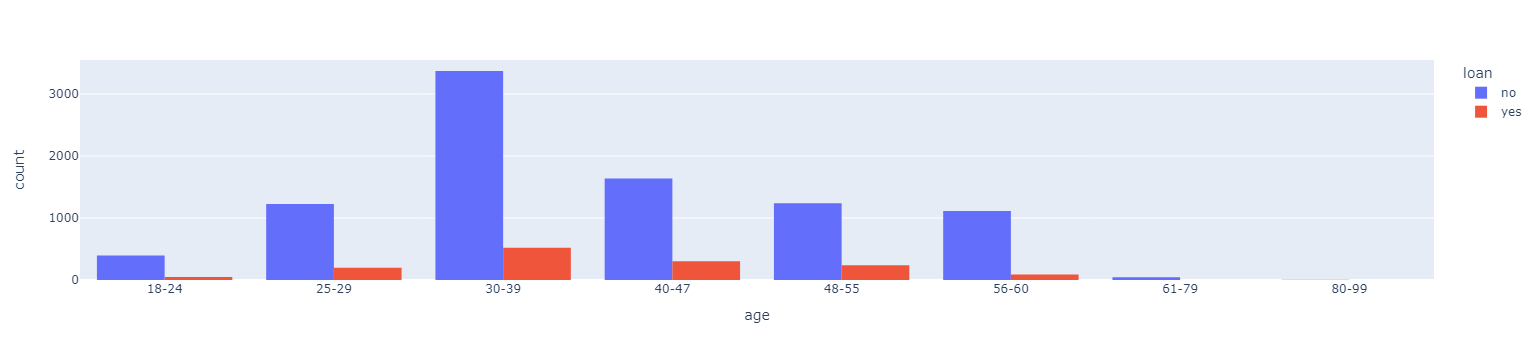

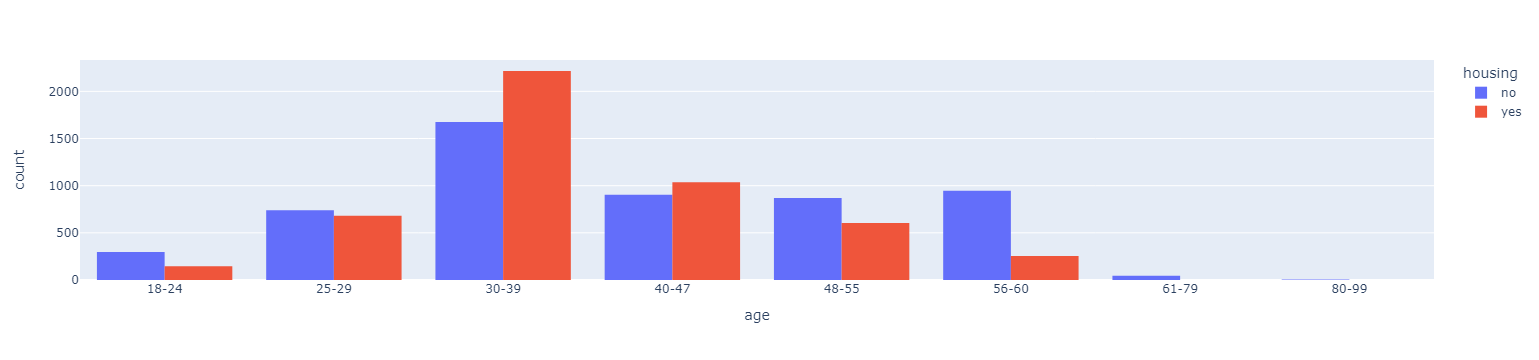

In [227]:
fig = px.histogram(dfClientDataReadable, x="age",color="loan", barmode="group")
fig.show()
fig = px.histogram(dfClientDataReadable, x="age", color="housing", barmode="group")
fig.show()


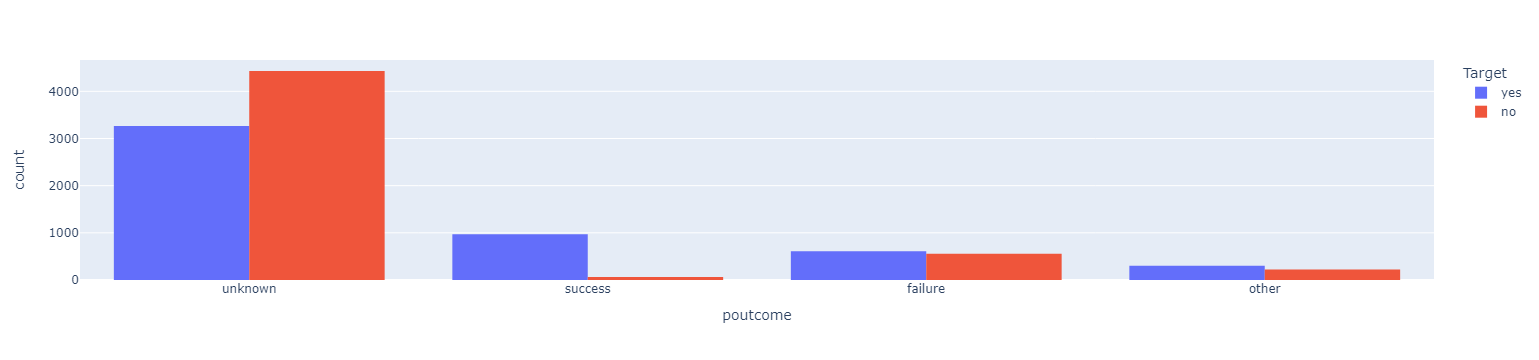

In [256]:
fig = px.histogram(dfClientDataReadable, x="poutcome", color="Target", barmode="group")
fig.show()

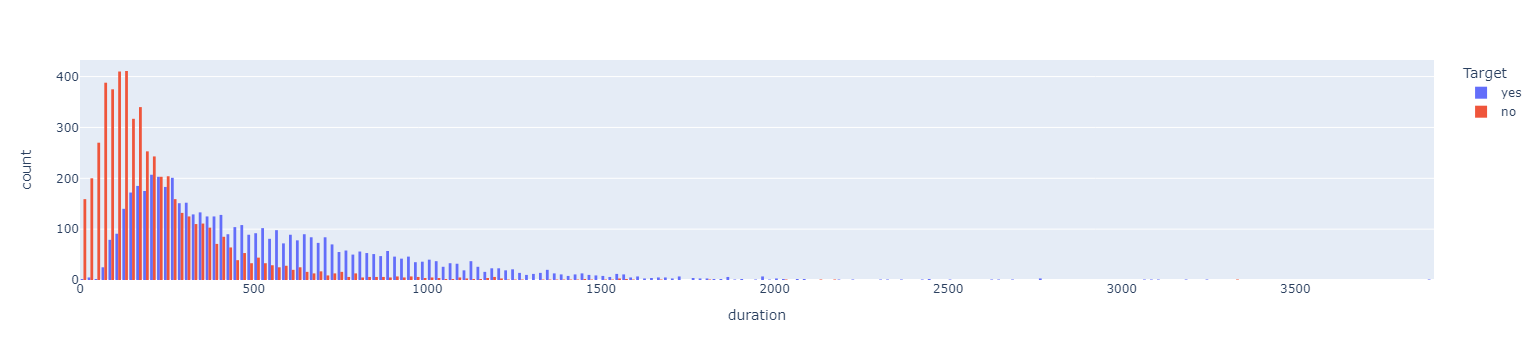

In [260]:
fig = px.histogram(dfClientDataReadable, x="duration", color="Target", barmode="group")
fig.show()

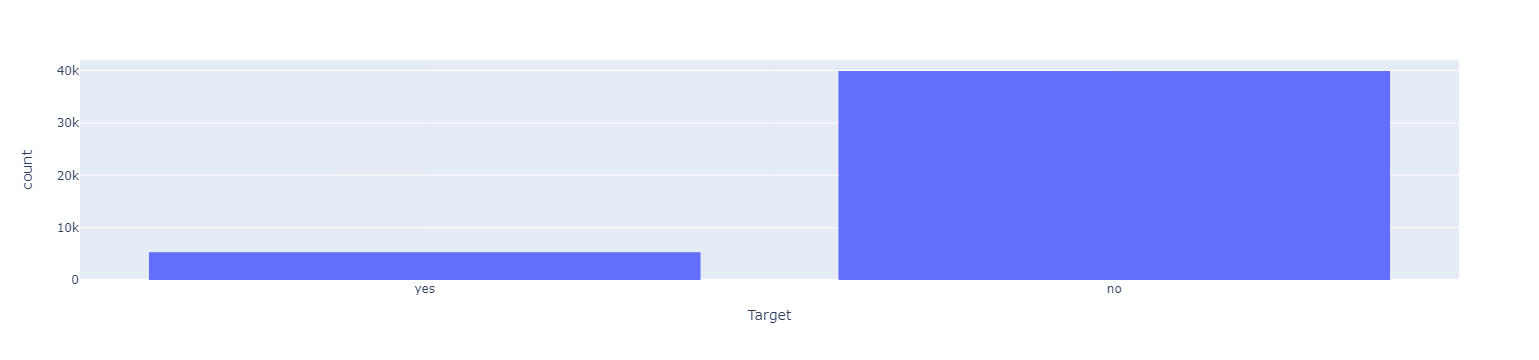

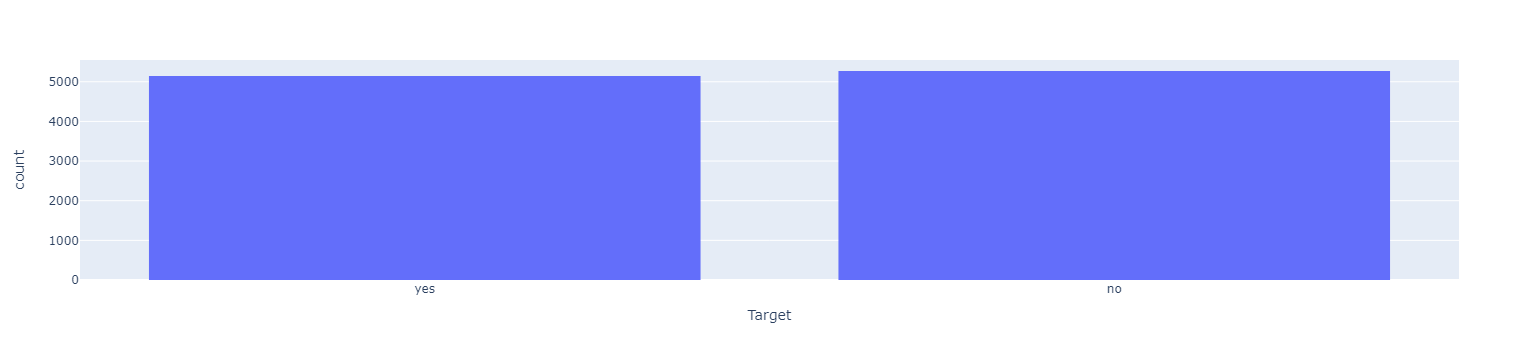

In [255]:
fig = px.histogram(dfClientBrutData.Target, x='Target')
fig.show()

fig = px.histogram(dfClientDataReadable.Target, x='Target')
fig.show()

#dfClientBrutData

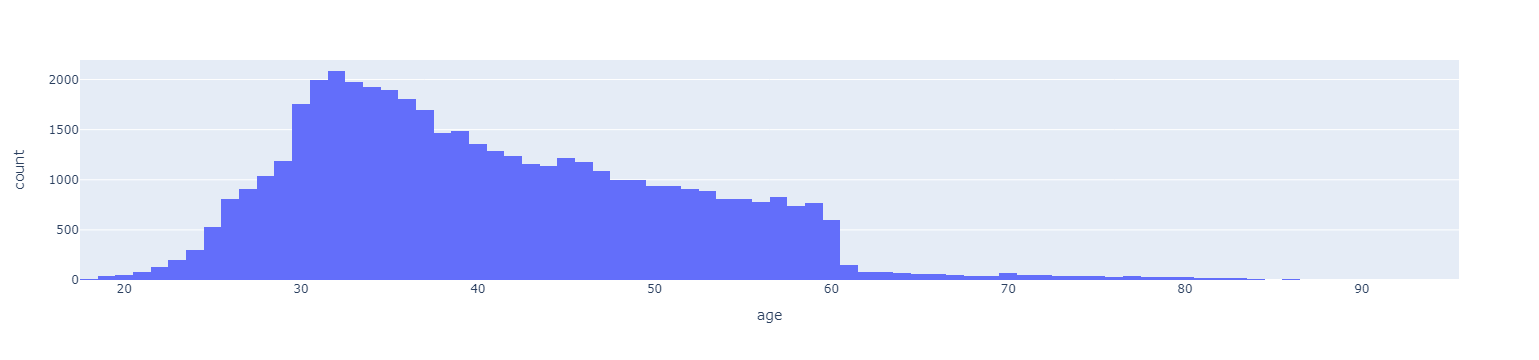

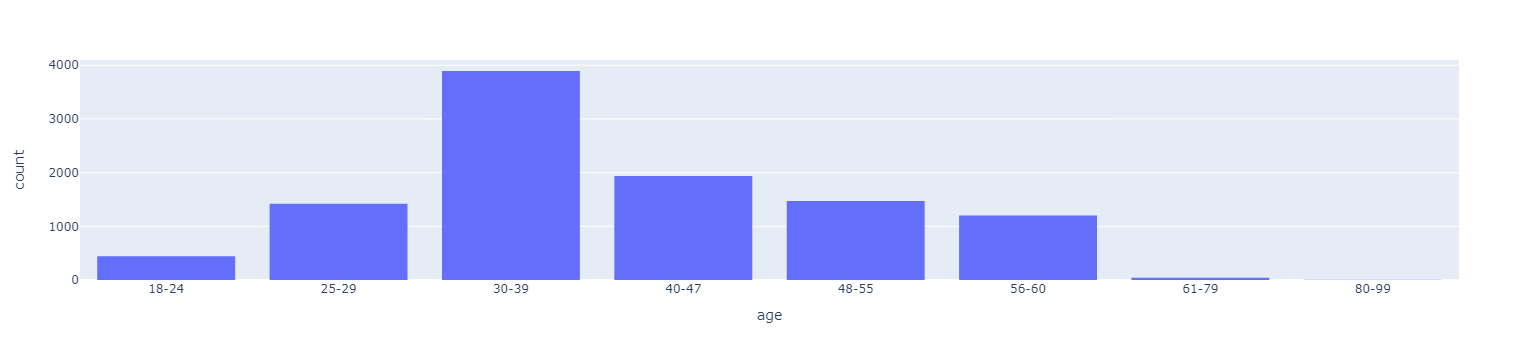

In [254]:
fig = px.histogram(dfClientBrutData, x="age")
fig.show()
fig = px.histogram(dfClientDataReadable, x="age")
fig.show()

Score train :  100.0 %
Score test :  84.72090823084201 %


# Second model

In [ ]:
# #split data for the second model

# dfBankCampaignData = dfCsv[['contact','day','month','duration','campaign','pdays','previous','poutcome','Target']]
# dfBankCampaignData

In [28]:
# rf1 = RandomForestClassifier(n_estimators = 100, random_state = 23, max_features = 2)

In [21]:
# rf1.fit(X=x_train, y=y_train)

In [20]:
#Chaque colonne elle prend en compte à 8% Pclass, 25% le Sex etc, ainsi c'est l'importance des données en entrer 
# pd.DataFrame(rf.feature_importances_*100,x_train.columns, columns=['Importance en %'])

In [22]:
# print_score(rf1)